In [1]:
import matplotlib.pyplot as plt
import numpy as np
from synthacc.source.rupture.slip import MaiBeroza2002RFSDC, RandomFieldSDG

In [2]:
c = MaiBeroza2002RFSDC(100, 100)

In [3]:
hs, aws, als = [], [], []
for i in range(1000):
    hs.append(c.get_acf().h)
    aws.append(c.get_aw(25000))
    als.append(c.get_al(55000))

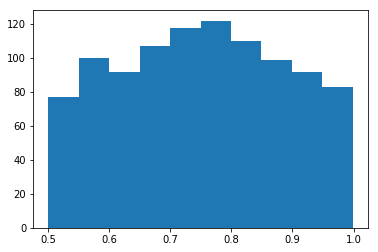

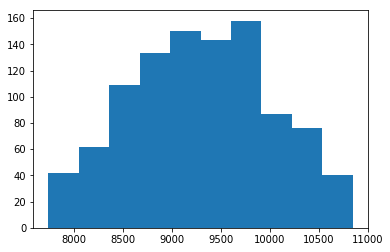

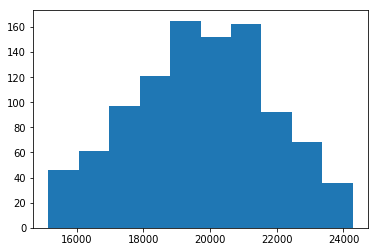

In [4]:
plt.hist(hs)
plt.show()

plt.hist(aws)
plt.show()

plt.hist(als)
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

from faults import rauw_simple_fault

from synthacc.source.rupture.slip import MaiBeroza2002RFSDC, RandomFieldSDG

In [6]:
segment = rauw_simple_fault()
magnitude = 6.5

In [7]:
c = MaiBeroza2002RFSDC(100, 100, 0.85)
g = RandomFieldSDG(c, segment.width, segment.length, magnitude)

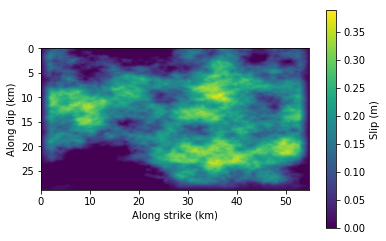

In [8]:
sd = g()
sd.plot()

In [9]:
n = 100

avgs = np.zeros(n)
maxs = np.zeros(n)
stds = np.zeros(n)

for i in tqdm_notebook(range(n)):
    sd = g()
    avgs[i] = sd.avg
    maxs[i] = sd.max
    stds[i] = sd.values.std()

In [10]:
print(avgs.mean(), maxs.mean())

0.14020580706806438 0.48700770342833466


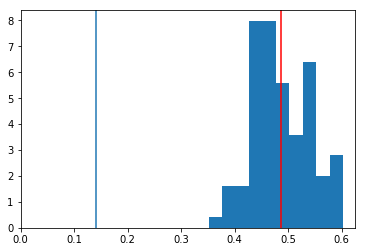

In [11]:
plt.hist(maxs, density=True)
plt.axvline(avgs.mean())
plt.axvline(maxs.mean(), c='r')
plt.xlim(0)
plt.show()

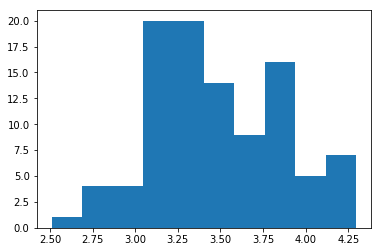

In [12]:
ratios = maxs / avgs
plt.hist(ratios)
plt.show()

0.10940350679518747


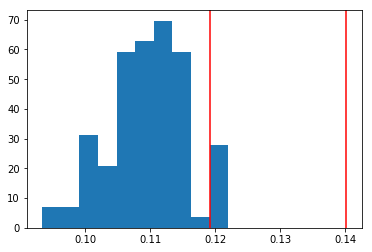

In [13]:
print(stds.mean())
plt.hist(stds, density=True)
plt.axvline(avgs.mean(), c='r')
plt.axvline(avgs.mean()*c._sd, c='r')

plt.show()

sizes of taper resembles GP

Wesnousky 2008 and others give ratios of 0.2-0.8 for average/maximum slip (obtained with 0.85 of GP)